Given the attached trajectories (8 1-d trajectories, 100 points), apply
GMM based learning from demonstration and plot:
- trajectories
- means and co-variances of Gaussians.

with 8 and 16 gaussians.

Automatically created module for IPython interactive environment
[[-5.82359477  1.07834082]
 [-5.7764625   2.53719633]
 [-5.56191679  0.94189863]
 [-5.52800004  1.74895433]
 [-5.50766706  2.36861679]
 [-5.35727711  3.24384157]
 [-5.16991399  2.65590578]
 [-5.07596773  2.95399478]
 [-4.84528244  2.75815573]
 [-4.83771987  2.45081471]
 [-4.99866192  3.39073219]
 [-4.53125561  2.54126181]
 [-4.26506006  2.05484136]
 [-4.36179597  2.70988259]
 [-4.08743019  3.55403263]
 [-4.09954967  2.70739372]
 [-4.07815928  1.06097827]
 [-3.89850821  2.07675021]
 [-3.61502422  2.40658125]
 [-3.65112227  1.17940833]
 [-3.59158117  0.16295538]
 [-3.53168919  1.82360092]
 [-3.28636368  0.01816031]
 [-3.23501429  0.37093669]
 [-3.14546084 -0.5982571 ]
 [-2.947954   -0.606105  ]
 [-2.78382415 -1.90103972]
 [-2.60989816 -1.27126624]
 [-2.47476451 -1.65828551]
 [-2.41918473 -2.33990239]
 [-2.29733486 -2.58700936]
 [-2.18573974 -3.61867033]
 [-1.96101879 -2.99485875]
 [-2.01611753 -2.60358134]
 [-1.81816383 -2.

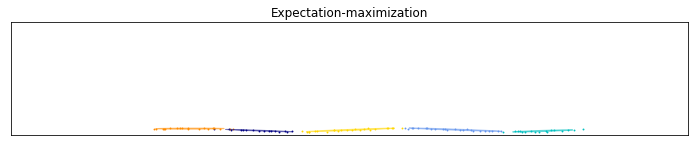

In [1]:
#Reference: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_sin.html#sphx-glr-auto-examples-mixture-plot-gmm-sin-py

import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(5, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-10., 5. * np.pi - 6.)
    plt.ylim(-10., 200.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


def plot_samples(X, Y, n_components, index, title):
    plt.subplot(5, 1, 4 + index)
    for i, color in zip(range(n_components), color_iter):
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)
    
    plt.xlim(-10., 10. * np.pi - 6.)
    plt.ylim(-10., 200.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


# Parameters
n_samples = 100

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4. * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3. * (np.sin(x) + np.random.normal(0, .2))

print(X)
    
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=.04, top=0.95, hspace=.2, wspace=.05,
                    left=.03, right=.97)

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=100).fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')


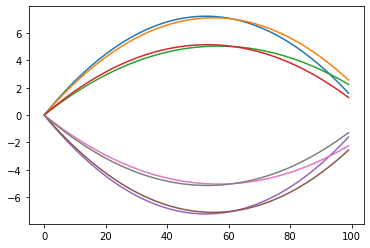

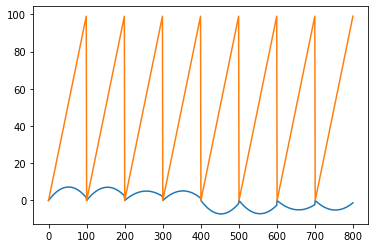

In [2]:
trajectoryLength=100
trajectoryNo=8
otherTypeDataInput=np.zeros(8*100*2).reshape(800,2)
trajectories=np.zeros(trajectoryLength*trajectoryNo).reshape(trajectoryNo,trajectoryLength)
for i in range(trajectoryNo):
    with open('cmpe58yhw5/obs-x'+str(i)+".txt") as f:
        trajectories[i] = f.readlines()
        for j in range(len(trajectories[i])):
            otherTypeDataInput[i*100+j]=np.array([trajectories[i][j],j])

trajectoriesMean=np.zeros(trajectoryNo)
trajectoriesVar=np.zeros(trajectoryNo)
for i in range(trajectoryNo):
    plt.plot(trajectories[i])
    trajectoriesMean[i]=np.mean(trajectories[i])
    trajectoriesVar[i]=np.var(trajectories[i])
plt.show()

plt.plot(otherTypeDataInput[:,0])
plt.plot(otherTypeDataInput[:,1])
plt.show()


These are input plots, they are taken into otherTypeDataInput as [x,y] data points.

Lets run the mixture model in a naive sense, though it gives a good estimate.

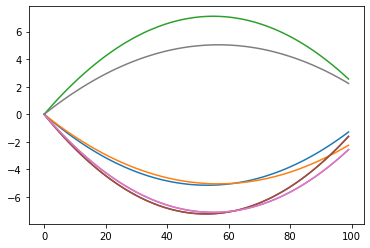

In [3]:
X=trajectories
# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(X)

for i in range(8):
    plt.plot((gmm.sample(n_samples=1)[0][0]))

Now we run gaussian mixture model from sklearn.  
This plot needs to be rotated 90 degrees.  
Different mixture models with different gaussian cluster nos.

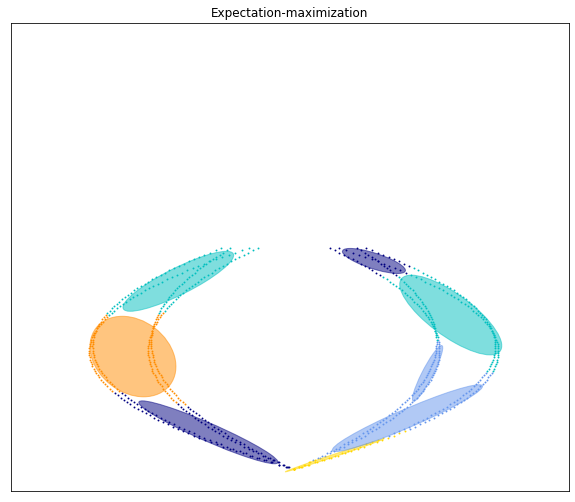

In [4]:
plt.figure(figsize=(10, 50))
X=otherTypeDataInput
# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')

In [5]:
print("Means of gaussians:")
print(gmm.means_)
print("Covariances of gaussians:")
print(gmm.covariances_)

Means of gaussians:
[[-3.01741742 16.43521515]
 [-4.07986043 84.1091818 ]
 [ 4.72426317 42.85021952]
 [ 1.41095352  5.98422235]
 [-5.68222781 50.38293   ]
 [ 2.82893086 93.22461467]
 [ 5.54175803 68.99009125]
 [ 4.01208063 22.78168627]]
Covariances of gaussians:
[[[ 3.02279158e+00 -1.64390442e+01]
  [-1.64390442e+01  9.93313658e+01]]

 [[ 1.91093618e+00  1.13961300e+01]
  [ 1.13961300e+01  9.03299268e+01]]

 [[ 1.43487093e-01  3.06773395e+00]
  [ 3.06773395e+00  7.79406861e+01]]

 [[ 1.47150150e+00  6.21905291e+00]
  [ 6.21905291e+00  2.64664928e+01]]

 [[ 1.15233257e+00 -3.40588738e+00]
  [-3.40588738e+00  1.62787195e+02]]

 [[ 6.19417017e-01 -2.36065365e+00]
  [-2.36065365e+00  1.57469048e+01]]

 [[ 1.62418343e+00 -1.23884044e+01]
  [-1.23884044e+01  1.59488956e+02]]

 [[ 3.52175273e+00  1.89318026e+01]
  [ 1.89318026e+01  1.12084304e+02]]]


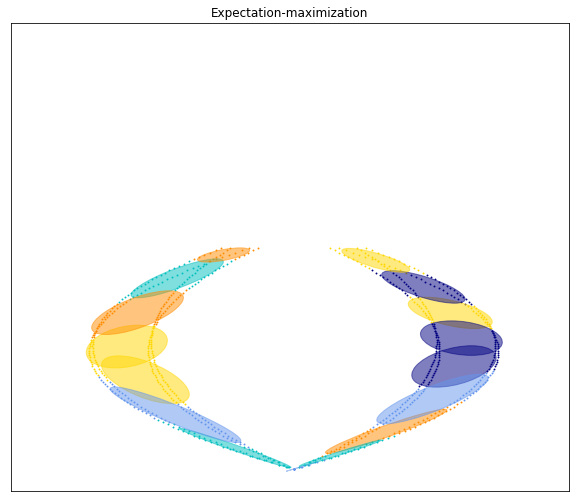

In [6]:
plt.figure(figsize=(10, 50))
X=otherTypeDataInput
# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=16, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')

In [7]:
print("Means of gaussians:")
print(gmm.means_)
print("Covariances of gaussians:")
print(gmm.covariances_)

Means of gaussians:
[[ 5.52353426 69.93500021]
 [ 3.26029149 16.89733648]
 [ 5.65550717 45.95310326]
 [-4.11845323 85.44287337]
 [ 0.27011176  1.02259785]
 [-5.24227129 39.98438461]
 [-2.48329133 95.90909793]
 [ 5.91763255 58.64830676]
 [-2.06434447  9.40069474]
 [ 4.89667119 31.33447077]
 [-5.89902783 54.85954085]
 [-5.52045956 70.0552968 ]
 [ 4.57632425 81.58600629]
 [ 1.64884309  7.15070971]
 [-4.17803222 24.3149739 ]
 [ 2.89308706 93.50276674]]
Covariances of gaussians:
[[[  1.10145176  -2.95843252]
  [ -2.95843252  24.60096189]]

 [[  2.3044051   10.21872354]
  [ 10.21872354  49.15486574]]

 [[  1.11124867   2.86680104]
  [  2.86680104  43.03479757]]

 [[  1.33035153   6.03860765]
  [  6.03860765  38.1429253 ]]

 [[  0.14847124   0.56259121]
  [  0.56259121   2.13246131]]

 [[  1.20103529  -5.07735097]
  [ -5.07735097  57.39970471]]

 [[  0.42275947   0.93720975]
  [  0.93720975   5.06824658]]

 [[  1.04566249  -1.3453992 ]
  [ -1.3453992   29.85592972]]

 [[  1.9356766   -8.55557

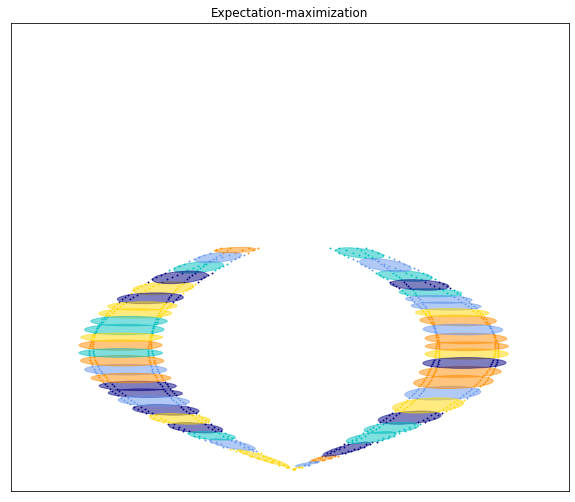

In [8]:
plt.figure(figsize=(10, 50))
X=otherTypeDataInput
# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=50, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')

In [9]:
print("Means of gaussians:")
print(gmm.means_)
print("Covariances of gaussians:")
print(gmm.covariances_)

Means of gaussians:
[[ 6.08013053e+00  5.84911473e+01]
 [-3.46285911e+00  1.84734025e+01]
 [-3.36569711e+00  9.04196024e+01]
 [-5.93979961e+00  4.45169671e+01]
 [-5.60170145e+00  6.97642024e+01]
 [ 1.03444577e+00  4.74631540e+00]
 [-4.51896159e+00  2.64986260e+01]
 [ 4.82553423e+00  7.89974073e+01]
 [ 5.25907711e+00  3.39770026e+01]
 [ 6.10529225e+00  5.15128409e+01]
 [-6.12096738e+00  5.55007827e+01]
 [ 4.09266009e+00  2.30027675e+01]
 [ 2.33905409e+00  9.66788765e+01]
 [ 5.37694024e+00  7.30100378e+01]
 [-4.61498173e+00  8.09850821e+01]
 [ 5.63552798e+00  3.90082274e+01]
 [-5.51353946e+00  3.72331930e+01]
 [ 3.92269469e+00  8.65331411e+01]
 [-2.16877973e+00  1.09385935e+01]
 [ 6.89376303e-02  3.02324339e-01]
 [ 5.80041289e+00  6.65264884e+01]
 [ 1.86647685e+00  8.90698423e+00]
 [-5.82036584e+00  6.62380023e+01]
 [-2.66395622e+00  9.47928151e+01]
 [ 4.74043883e+00  2.84760310e+01]
 [-6.06360873e+00  4.85123594e+01]
 [-5.06706119e+00  7.65009818e+01]
 [-5.98739902e+00  6.24795411e+01]


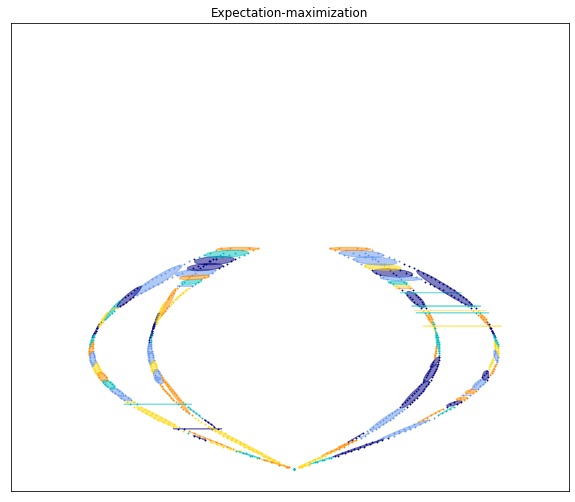

In [10]:
plt.figure(figsize=(10, 50))
X=otherTypeDataInput
# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=100, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')

In [11]:
print("Means of gaussians:")
print(gmm.means_)
print("Covariances of gaussians:")
print(gmm.covariances_)

Means of gaussians:
[[-7.15896224 53.94673016]
 [-3.39583144 18.        ]
 [-3.6225595  83.8693491 ]
 [ 6.09776982 33.        ]
 [ 4.98502001 62.33468678]
 [-0.633228    2.48873957]
 [-2.80365574 93.40429379]
 [-6.41787197 70.95226935]
 [ 6.53722767 37.97508953]
 [ 5.53078485 71.        ]
 [-4.46295518 33.92089812]
 [ 3.50353996 87.83772945]
 [ 5.08477542 56.26756231]
 [ 3.89032517 17.49288033]
 [-6.95374161 44.83880191]
 [ 1.44034161  8.41740166]
 [-6.99222885 62.06869594]
 [-3.50931088 25.49595707]
 [ 2.39119176 96.36430113]
 [-4.03498543 77.54626937]
 [ 3.9153548  81.        ]
 [ 4.83545623 42.90426901]
 [ 5.00844565 61.82770873]
 [ 2.49629336 14.99861463]
 [-2.0895472   8.49956325]
 [-1.98502389 98.59591697]
 [ 4.3079537  76.00840094]
 [ 0.          0.        ]
 [-4.75969754 39.75257311]
 [ 3.13408456 90.53109405]
 [ 4.80702992 67.34382675]
 [ 6.77228658 41.91964252]
 [ 5.37357517 26.00724673]
 [-3.49490255 87.85097092]
 [-5.76672647 30.        ]
 [-2.92251866 12.86617833]
 [-3.332